# Predifines

In [1]:
# Для функционирования watermark - раскомментируйте строку ниже, либо установите библиотеку в консоли вручную
# !pip install watermark
%load_ext watermark

In [2]:
%watermark -v -m -p numpy,matplotlib,pandas,sklearn,seaborn -g

Python implementation: CPython
Python version       : 3.10.7
IPython version      : 8.5.0

numpy     : 1.23.4
matplotlib: 3.6.0
pandas    : 1.5.1
sklearn   : 0.0
seaborn   : 0.12.1

Compiler    : Clang 13.0.0 (clang-1300.0.29.30)
OS          : Darwin
Release     : 21.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

Git hash: c6b65eda551ecd053e4d92f2c45874024041d811



# Modules

In [3]:
# Future Python versions compatibility
from __future__ import division

# Warnings Ignore
import warnings
warnings.filterwarnings("ignore")

# System libraries
import os
import random

# Object libraries
import pandas as pd
import numpy as np
import seaborn as sns


# Data Transformers
from sklearn.preprocessing import LabelEncoder,PowerTransformer, StandardScaler
from collections import Counter
from sklearn.compose import ColumnTransformer

# Visualize libraries
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import plotly.express as px

# Colors map
colors_list = list(colors._colors_full_map.values())
cust_palt = [
            '#111d5e', 
            '#c70039', 
            '#f37121', 
            '#ffbd69', 
            '#ffc93c',
            ]
plt.style.use('ggplot')
%matplotlib inline

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

In [4]:
os.path.abspath(os.getcwd())

'/Users/a.ustsov/technopark/artem_ustsov/ml_project/notebooks'

# Functions and Classes

In [5]:
def seed_all(seed):
    """A function to seed everything for getting stable results and reproducibility"""
    
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

seed = 42    
seed_all(seed)

In [6]:
def missing_values_table(df : pd.DataFrame) -> pd.DataFrame:
    """Missing values detection function"""

    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
                                mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
                                '% of Total Values', ascending=False).round(2)

    print("Your selected dataframe has "  + str(df.shape[0]) + " objects with " + str(df.shape[1]) 
                                          + " features.\n"
                             "There are " + str(mis_val_table_ren_columns.shape[0]) +
                             " features that have missing values.")

    return mis_val_table_ren_columns

In [7]:
def ctg_view(df, cols, hue=None, rows=3, columns=3):
    """A function for displaying cateorical distribution"""
    
    fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                    data=df,
                    palette=cust_palt,
                    hue=hue,
                    ax=j,
                    order=df[i].value_counts().index)
        j.tick_params(labelrotation=10)
        
        total = float(len(df[i]))
        j.set_title(f'{str(i).capitalize()} Distribution')
        
        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')
        
        plt.tight_layout()

In [8]:
def ctn_freq(df, cols, xaxi, hue=None,rows=4, columns=1):
    """A function for displaying numerical data frequency vs age and condition"""
    
    fig, axes = plt.subplots(rows, columns, figsize=(16, 12), sharex=True)
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.pointplot(x=xaxi,
                      y=i,
                    data=df,
                    palette=cust_palt[:2],
                    hue=hue,
                    ax=j,ci=False)      
        j.set_title(f'{str(i).capitalize()} vs. Age')

        
        plt.tight_layout()

# 0. Data Processing

In [9]:
data_path = os.path.join(os.path.dirname(os.getcwd()), "data/raw")
raw_data_filename = "heart_cleveland_upload.csv"

In [10]:
raw_data = pd.read_csv(os.path.join(data_path, raw_data_filename))
raw_data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
0        1   1     0          0  
1        0   2     0          0  
2        2   0     0          0  
3        1   1     0          1  
4        1   0     0          0  
..     ...  ..   ...        ...  
292      0   0     2          1  
293      1   0     2          1  
294      1   0     2          1  
295      0   0     0          0  
296      0   0     2          1  

[297 rows x 14 columns]

In [11]:
missing_values_table(raw_data)

Your selected dataframe has 297 objects with 14 features.
There are 0 features that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [12]:
# Renaming columns.
raw_data.columns = [
                    'age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 
                    'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
                    'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 
                    'thalassemia', 'condition',
                   ]

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      297 non-null    int64  
 1   sex                      297 non-null    int64  
 2   chest_pain_type          297 non-null    int64  
 3   resting_blood_pressure   297 non-null    int64  
 4   cholesterol              297 non-null    int64  
 5   fasting_blood_sugar      297 non-null    int64  
 6   rest_ecg                 297 non-null    int64  
 7   max_heart_rate_achieved  297 non-null    int64  
 8   exercise_induced_angina  297 non-null    int64  
 9   st_depression            297 non-null    float64
 10  st_slope                 297 non-null    int64  
 11  num_major_vessels        297 non-null    int64  
 12  thalassemia              297 non-null    int64  
 13  condition                297 non-null    int64  
dtypes: float64(1), int64(13)
m

In [14]:
# Number of unique train observartions:
raw_data.nunique()

age                         41
sex                          2
chest_pain_type              4
resting_blood_pressure      50
cholesterol                152
fasting_blood_sugar          2
rest_ecg                     3
max_heart_rate_achieved     91
exercise_induced_angina      2
st_depression               40
st_slope                     3
num_major_vessels            4
thalassemia                  3
condition                    2
dtype: int64

In [15]:
# Renaming cateorical data for easier understanding:

raw_data['sex'] = raw_data['sex'].map({0:'female',
                                       1:'male'})
raw_data['chest_pain_type'] = raw_data['chest_pain_type'].map({0:'typical_angina',
                                                         1:'atypical_angina', 
                                                         2:'non_anginal_pain',
                                                         3:'asymptomatic',
                                                         })
raw_data['fasting_blood_sugar'] = raw_data['fasting_blood_sugar'].map({0:'less_than_120mg/ml',
                                                                 1:'greater_than_120mg/ml',
                                                                })
raw_data['rest_ecg'] = raw_data['rest_ecg'].map({0:'normal',
                                           1:'ST-T_wave_abnormality',
                                           2:'left_ventricular_hypertrophy',
                                          })
raw_data['exercise_induced_angina'] = raw_data['exercise_induced_angina'].map({0:'no',
                                                                         1:'yes'})
raw_data['st_slope'] = raw_data['st_slope'].map({0:'upsloping',
                                           1:'flat',
                                           2:'downsloping',
                                          })
raw_data['thalassemia'] = raw_data['thalassemia'].map({1:'fixed_defect',
                                                 0:'normal',
                                                 2:'reversable_defect',
                                                })
raw_data['condition'] = raw_data['condition'].map({0:'no_disease', 
                                             1:'has_disease'})

In [16]:
# Masks for easier selection in future:
categorical = ["sex", "chest_pain_type", "fasting_blood_sugar", "rest_ecg", 
               "exercise_induced_angina", "st_slope", "thalassemia", "condition"]

numerical = ['age', 'resting_blood_pressure', 'cholesterol', 
            'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']

# 1. Univariate Analysis

> Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and it's major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

__For this part we going to inspect how's the data distribution is and what patterns we can inspect.__

## 1.1 Categorical Data

In [17]:
raw_data[categorical]

sex chest_pain_type    fasting_blood_sugar  \
0      male  typical_angina  greater_than_120mg/ml   
1    female  typical_angina     less_than_120mg/ml   
2    female  typical_angina     less_than_120mg/ml   
3      male  typical_angina  greater_than_120mg/ml   
4      male  typical_angina     less_than_120mg/ml   
..      ...             ...                    ...   
292    male    asymptomatic     less_than_120mg/ml   
293    male    asymptomatic     less_than_120mg/ml   
294    male    asymptomatic     less_than_120mg/ml   
295  female    asymptomatic     less_than_120mg/ml   
296    male    asymptomatic     less_than_120mg/ml   

                         rest_ecg exercise_induced_angina     st_slope  \
0    left_ventricular_hypertrophy                      no         flat   
1                          normal                      no    upsloping   
2                          normal                      no  downsloping   
3    left_ventricular_hypertrophy                      no         flat   
4    left_ventricular_hypertrophy                     yes         flat   
..                            ...                     ...          ...   
292                        normal                      no    upsloping   
293                        normal                      no         flat   
294                        normal                     yes         flat   
295                        normal                      no    upsloping   
296  left_ventricular_hypertrophy                     yes    upsloping   

           thalassemia    condition  
0               normal   no_disease  
1               normal   no_disease  
2               normal   no_disease  
3               normal  has_disease  
4               normal   no_disease  
..                 ...          ...  
292  reversable_defect  has_disease  
293  reversable_defect  has_disease  
294  reversable_defect  has_disease  
295             normal   no_disease  
296  reversable_defect  has_disease  

[297 rows x 8 columns]

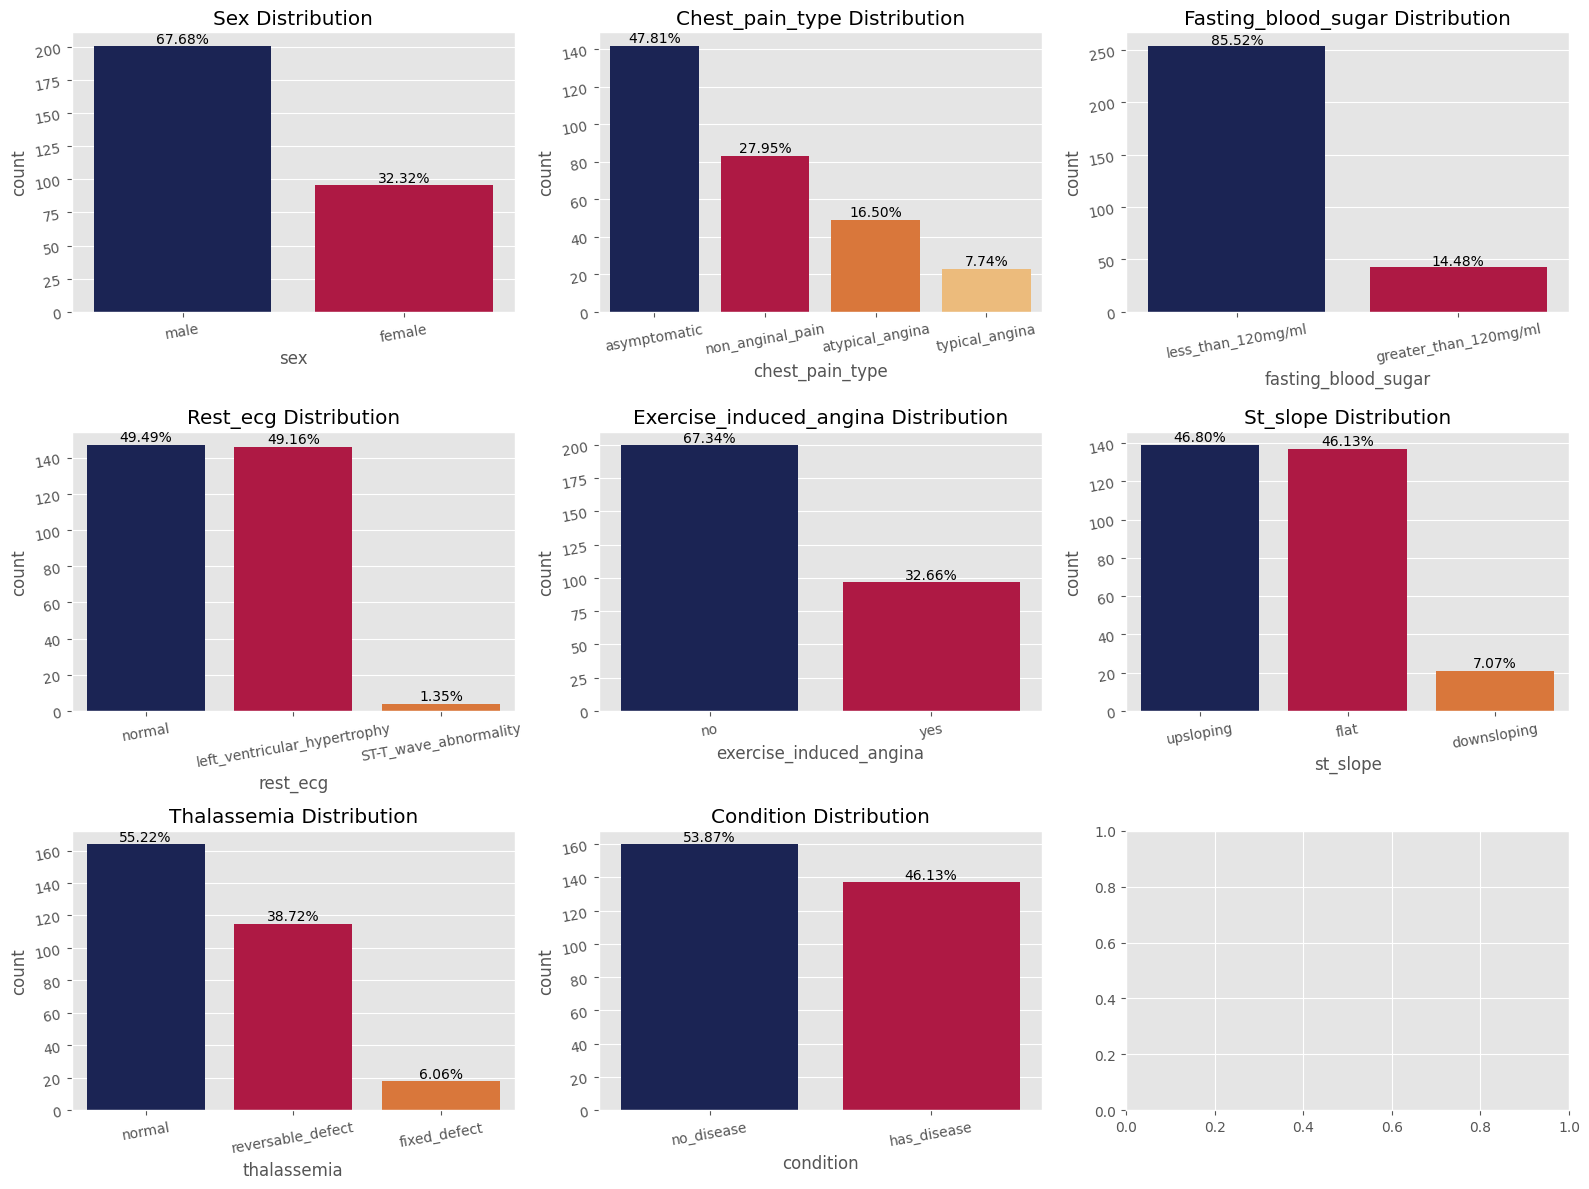

In [18]:
# Display categorical data
ctg_view(raw_data, categorical)

### Here we can do these observations:
- Males on the dataset is more than double of the female observations.
- Most common ches pain type is 'Asymptomatic' ones which is almost 50% of the data
- 85% of the patients has no high levels of fastin blood sugar.
- Resing electrocardiographic observations are evenly distributed between normal and left ventricular hypertrophy with ST-T minority
- 67% of the patients had no exercise induced angina
- Peak exercise slope seems mainly divided between upsloping and flat.

## 1.2 Numerical Data

In [19]:
numerical

['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression',
 'num_major_vessels']

In [20]:
raw_data[numerical]

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
0     69                     160          234                      131   
1     69                     140          239                      151   
2     66                     150          226                      114   
3     65                     138          282                      174   
4     64                     110          211                      144   
..   ...                     ...          ...                      ...   
292   40                     152          223                      181   
293   39                     118          219                      140   
294   35                     120          198                      130   
295   35                     138          183                      182   
296   35                     126          282                      156   

     st_depression  num_major_vessels  
0              0.1                  1  
1              1.8                  2  
2              2.6                  0  
3              1.4                  1  
4              1.8                  0  
..             ...                ...  
292            0.0                  0  
293            1.2                  0  
294            1.6                  0  
295            1.4                  0  
296            0.0                  0  

[297 rows x 6 columns]

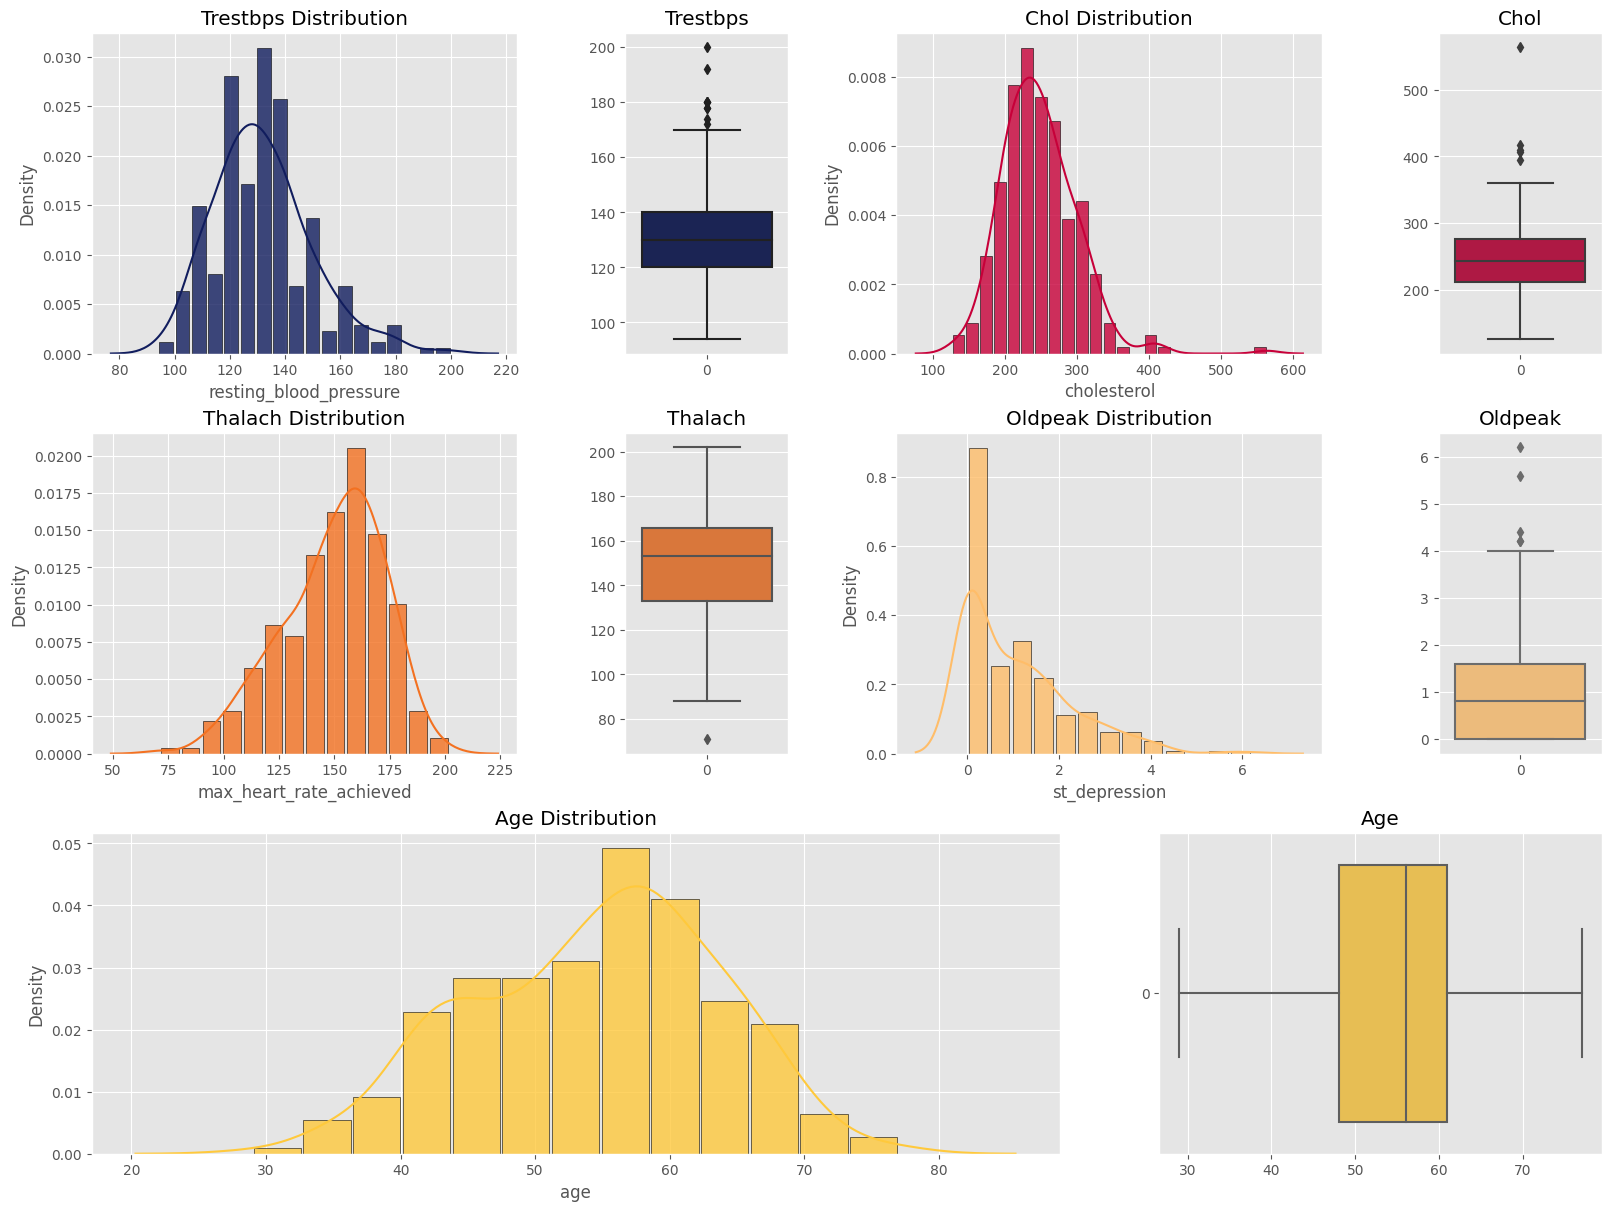

In [21]:
# Displaying numeric distribution:

fig = plt.figure(constrained_layout=True, figsize=(16, 12))
grid = gridspec.GridSpec(ncols=6, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Trestbps Distribution')
sns.distplot(raw_data[numerical[1]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[0])

ax15 = fig.add_subplot(grid[0, 2:3])
ax15.set_title('Trestbps')
sns.boxplot(raw_data[numerical[1]], orient='v', color=cust_palt[0])


ax2 = fig.add_subplot(grid[0, 3:5])
ax2.set_title('Chol Distribution')
sns.distplot(raw_data[numerical[2]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[1])

ax25 = fig.add_subplot(grid[0, 5:])
ax25.set_title('Chol')
sns.boxplot(raw_data[numerical[2]], orient='v', color=cust_palt[1])


ax3 = fig.add_subplot(grid[1, :2])
ax3.set_title('Thalach Distribution')
sns.distplot(raw_data[numerical[3]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[2])

ax35 = fig.add_subplot(grid[1, 2:3])
ax35.set_title('Thalach')
sns.boxplot(raw_data[numerical[3]], orient='v', color=cust_palt[2])


ax4 = fig.add_subplot(grid[1, 3:5])
ax4.set_title('Oldpeak Distribution')
sns.distplot(raw_data[numerical[4]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[3])

ax45 = fig.add_subplot(grid[1, 5:])
ax45.set_title('Oldpeak')
sns.boxplot(raw_data[numerical[4]], orient='v', color=cust_palt[3])


ax5 = fig.add_subplot(grid[2, :4])
ax5.set_title('Age Distribution')
sns.distplot(raw_data[numerical[0]],
                 hist_kws={
                 'rwidth': 0.95,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[4])

ax55 = fig.add_subplot(grid[2, 4:])
ax55.set_title('Age')
sns.boxplot(raw_data[numerical[0]], orient='h', color=cust_palt[4])


plt.show()

Most of the continuous variables somewhat close to gaussian distribution with small skews left or right except for oldpeak.   
__Again there are some outliers espacially a strong one in Cholesterol worth to take a look later.__

# 2. Bivariate Analysis

> Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.

In this part we goin to take our variables and compare them against our target condition which is if the observed patient has disease or not.

## 2.1 Categorical Data vs Target

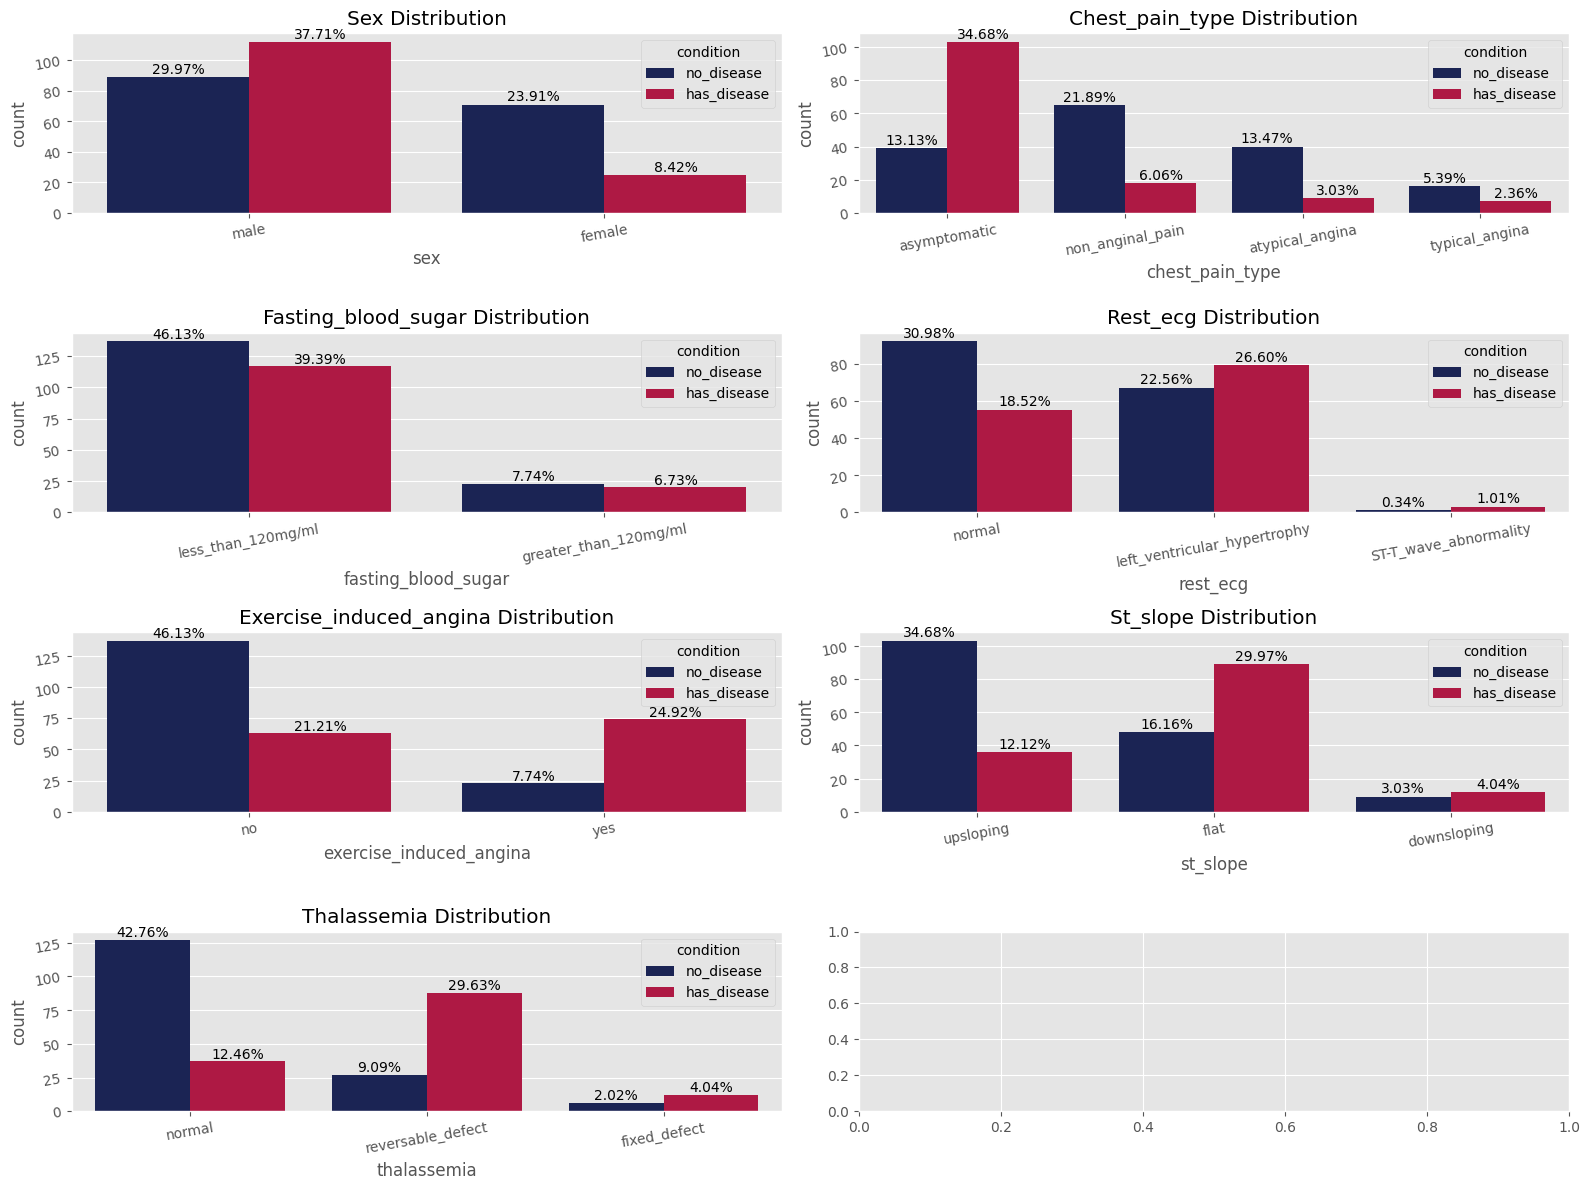

In [22]:
# Categorical data vs condition:
ctg_view(raw_data, categorical[:-1], hue='condition', rows=4, columns=2)

### Here we can do these observations:

- Males are much more likely for heart diseases.
- Chest pain type is very subjective and has no direct relation on the outcome, asymptomatic chest pains having highest disease outcome.
- Blood sugar has no direct effect on the disease.
- Rest ECG results showing no direct results but having normal ECG is pretty good sign. Even though it's pretty rare in the data, if you ST-T wave abnormality you are 3 times more likely to have heart disease.
- Having exercise induced angina is pretty strong indicator for heart disease, patients are almost 3 times more likely to have disease if they have exercise induced angina. Meanwhile it's less than half for not having it.
- Patients who had flat slope distribution are more likely to have disease.
- Number of major vessels observed seems on similar levels for patients who have disease but 0 observations is good sign for not having disease.
- Having defected thalium test results is pretty strong indicator for heart disease.

## 2.2 Numerical Data vs Target

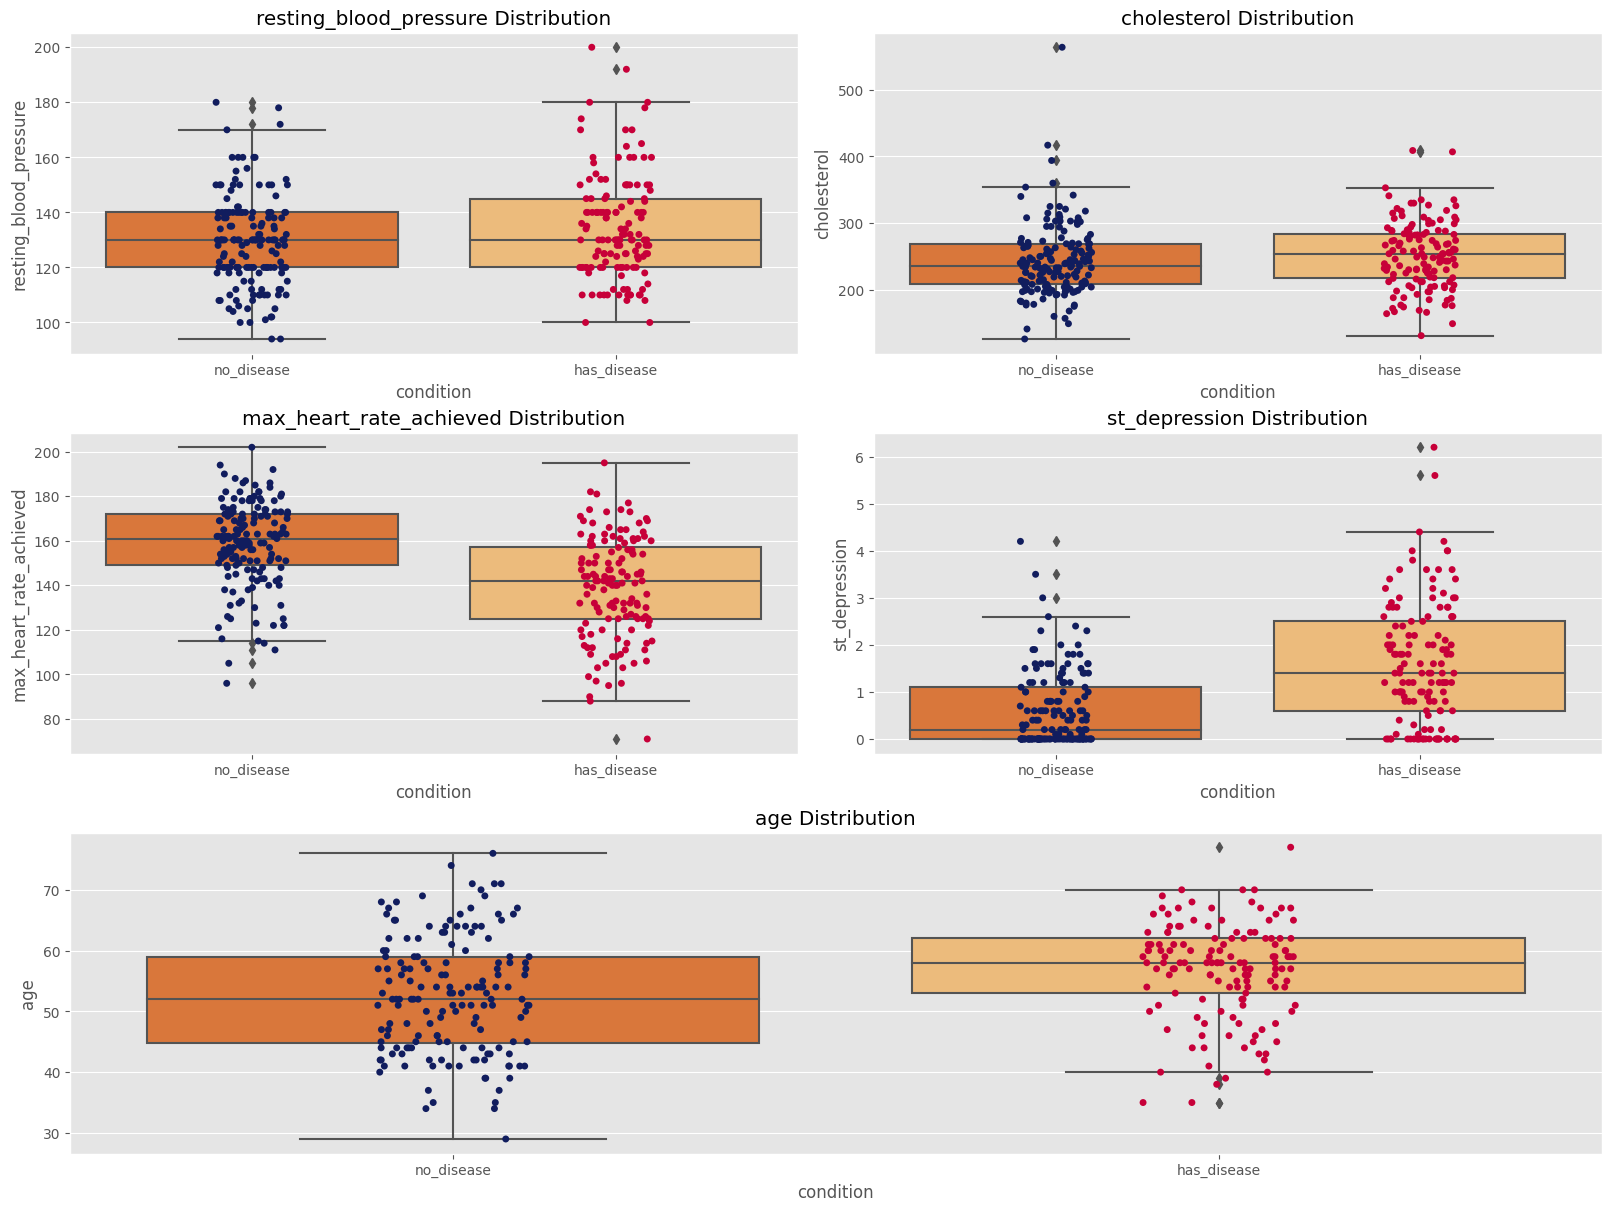

In [23]:
# Displaying numeric distribution vs condition:

fig = plt.figure(constrained_layout=True, figsize=(16, 12))
grid = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)


ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('resting_blood_pressure Distribution')
sns.boxplot(x='condition',
                    y='resting_blood_pressure',
                    data=raw_data,
                    palette=cust_palt[2:],
                    ax=ax1)
sns.stripplot(x='condition',
                    y='resting_blood_pressure',
                    data=raw_data,
                    palette=cust_palt[:2],
                    ax=ax1)


ax2 = fig.add_subplot(grid[0, 2:])
ax2.set_title('cholesterol Distribution')
sns.boxplot(x='condition',
                    y='cholesterol',
                    data=raw_data,
                    palette=cust_palt[2:],
                    ax=ax2)
sns.stripplot(x='condition',
                    y='cholesterol',
                    data=raw_data,
                    palette=cust_palt[:2],
                    ax=ax2)


ax3 = fig.add_subplot(grid[1, :2])
ax3.set_title('max_heart_rate_achieved Distribution')
sns.boxplot(x='condition',
                    y='max_heart_rate_achieved',
                    data=raw_data,
                    palette=cust_palt[2:],
                    ax=ax3)
sns.stripplot(x='condition',
                    y='max_heart_rate_achieved',
                    data=raw_data,
                    palette=cust_palt[:2],
                    ax=ax3)


ax4 = fig.add_subplot(grid[1, 2:])
ax4.set_title('st_depression Distribution')
sns.boxplot(x='condition',
                    y='st_depression',
                    data=raw_data,
                    palette=cust_palt[2:],
                    ax=ax4)
sns.stripplot(x='condition',
                    y='st_depression',
                    data=raw_data,
                    palette=cust_palt[:2],
                    ax=ax4)


ax5 = fig.add_subplot(grid[2, :])
ax5.set_title('age Distribution')
sns.boxplot(x='condition',
                    y='age',
                    data=raw_data,
                    palette=cust_palt[2:],
                    ax=ax5)
sns.stripplot(x='condition',
                    y='age',
                    data=raw_data,
                    palette=cust_palt[:2],
                    ax=ax5)


plt.show()

### Here we can do these observations:

- Having higher resting blood pressure shows you are little bit more likely to have heart disease.
- Again same for Cholesterol, it's not strong indicator but patients are little bit more likely to have disease with high cholesterol. There's is also one outlier there with no disease, pretty interesting.
- I find max heart rate distribution a bit interesting, expecting the other way around but it might be due to testing conditions and if you have normal results on ECG while exercising instructors might be increasing your excercise density?
- It's pretty clear that heart disease likelihood increases with ST depression levels...
- Lastly older patients are more likely to have heart disease.

# 3. Multivariate Analysis

> Multivariate analysis (MVA) is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time. Typically, MVA is used to address the situations where multiple measurements are made on each experimental unit and the relations among these measurements and their structures are important.

<Figure size 1600x1000 with 0 Axes>

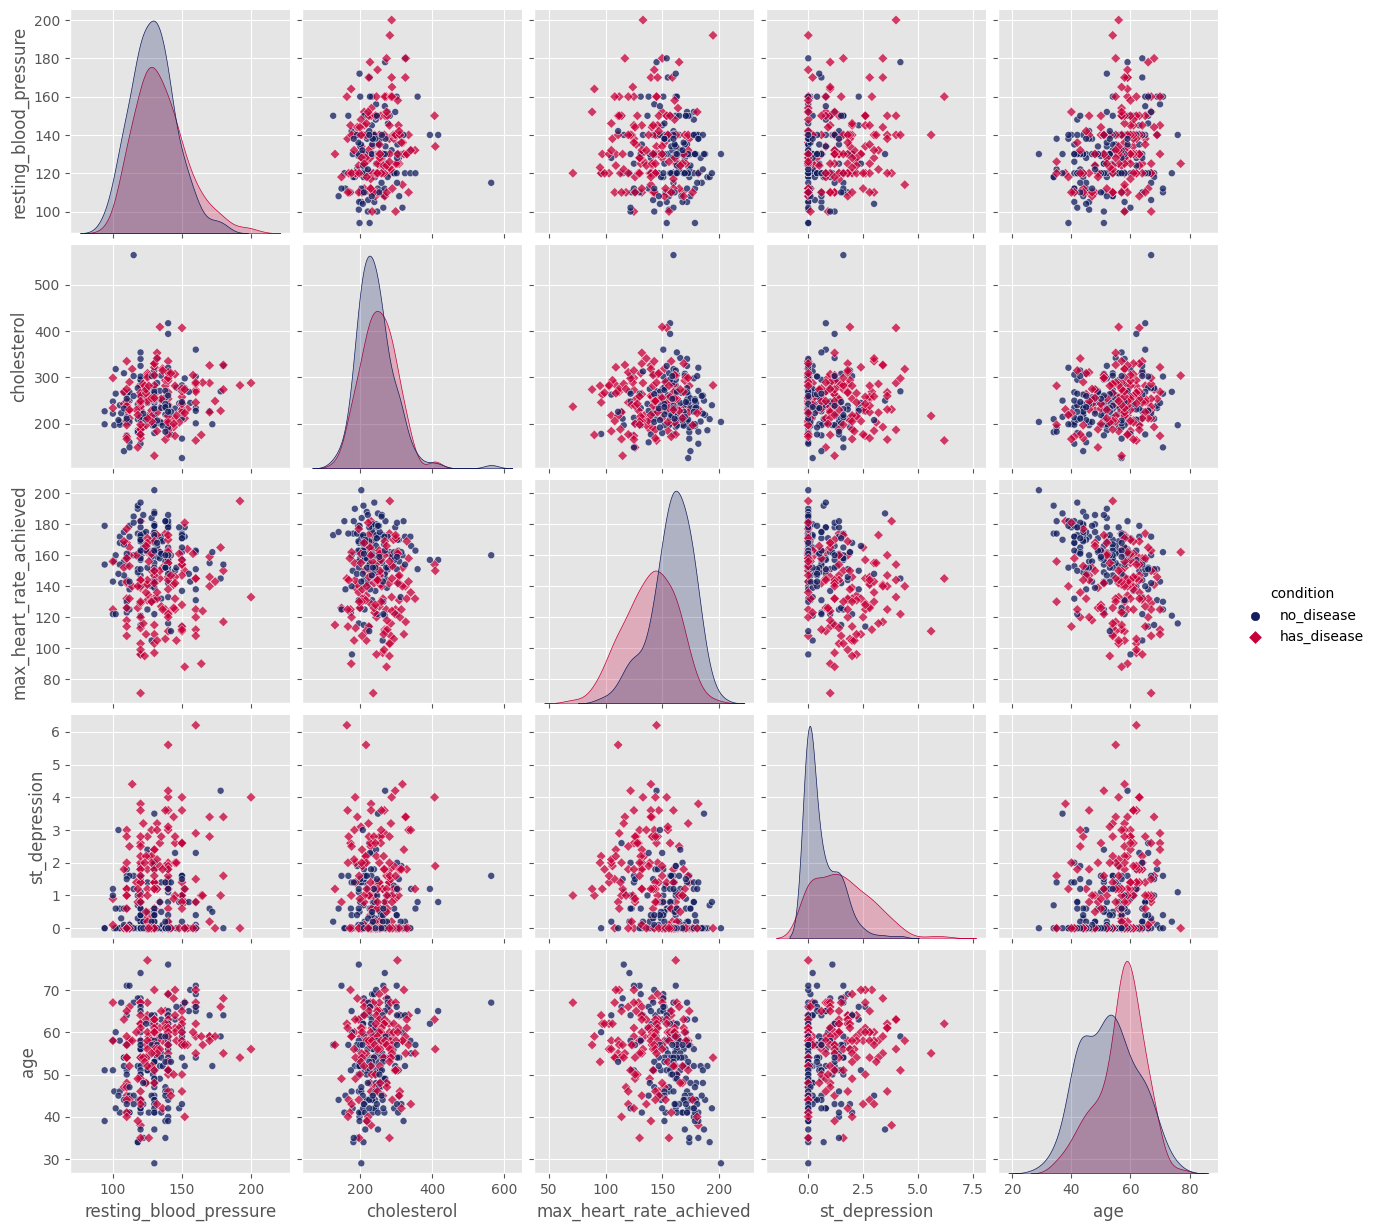

In [24]:
# Numeric data vs each other and condition:

plt.figure(figsize=(16, 10))
sns.pairplot(raw_data[
                          [
                           'resting_blood_pressure','cholesterol',
                           'max_heart_rate_achieved','st_depression',
                           'age', 'condition'
                          ]
                      ],
             hue='condition', 
             palette=cust_palt,
             markers=['o','D'], plot_kws=dict(s=25, alpha=0.75)
)

plt.show()

## 3.1 Cholesterol, Max Heart Rate, Age, St Depression vs Target

Here I tried to fit every single numerical feature into one graph so we can have some visualized version of the effects. 3D scatterplot is great tool for doing that.

On X axis we have __Cholesterol levels__, on Y __Max Heart Rate__ presented and Z axis is patient __Age__, marker sizes are based on __ST_Depression__ levels and coloring based on the patient condition.

In [25]:
# 3D scatterplot of numeric data:

fig = px.scatter_3d(raw_data, x='cholesterol', y='max_heart_rate_achieved', z='age', 
                    size='st_depression',
                    color='condition', opacity=0.8)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

# 4. Inspecting Age Closer

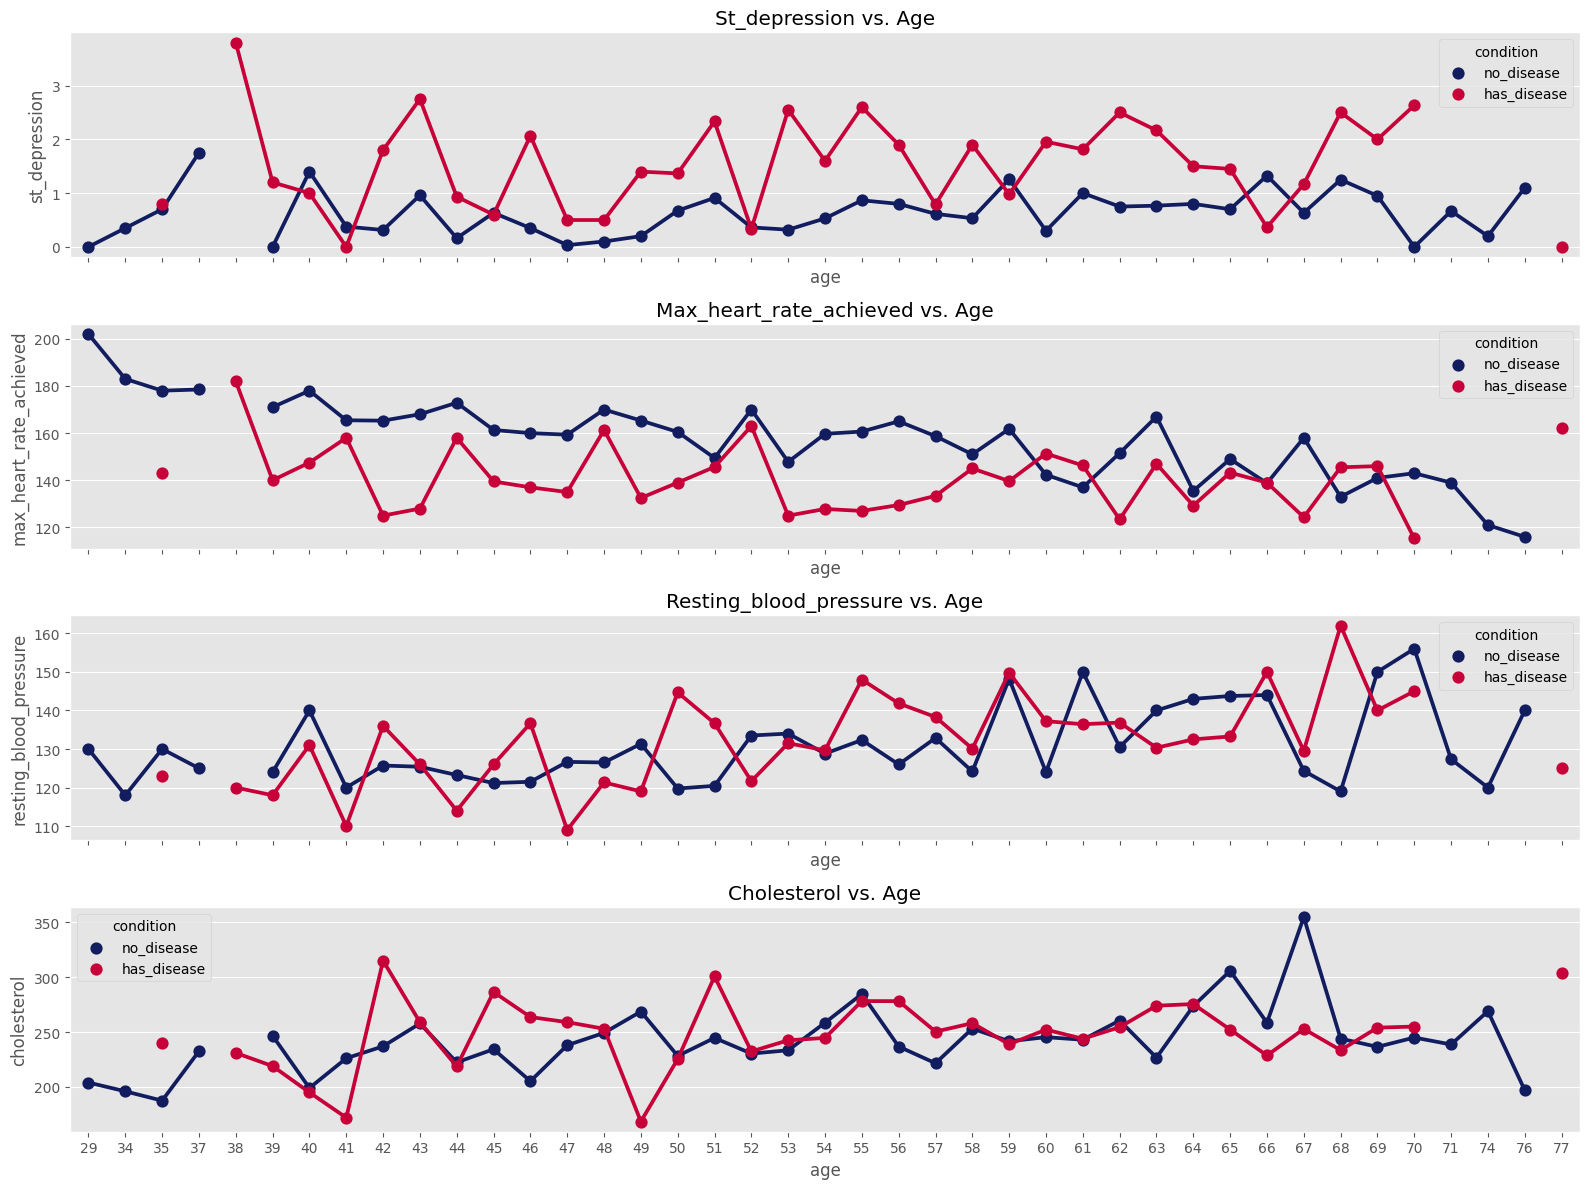

In [26]:
ctn_freq(raw_data, cols=['st_depression','max_heart_rate_achieved',
                         'resting_blood_pressure','cholesterol'], 
         xaxi='age', hue='condition', rows=4, columns=1)

# 5. Correlations
We're going to use pearson correlation for to find linear relations between features, heatmap is decent way to show these relations.

In [27]:
raw_heat = pd.read_csv(os.path.join(data_path, raw_data_filename))
raw_heat

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
0        1   1     0          0  
1        0   2     0          0  
2        2   0     0          0  
3        1   1     0          1  
4        1   0     0          0  
..     ...  ..   ...        ...  
292      0   0     2          1  
293      1   0     2          1  
294      1   0     2          1  
295      0   0     0          0  
296      0   0     2          1  

[297 rows x 14 columns]

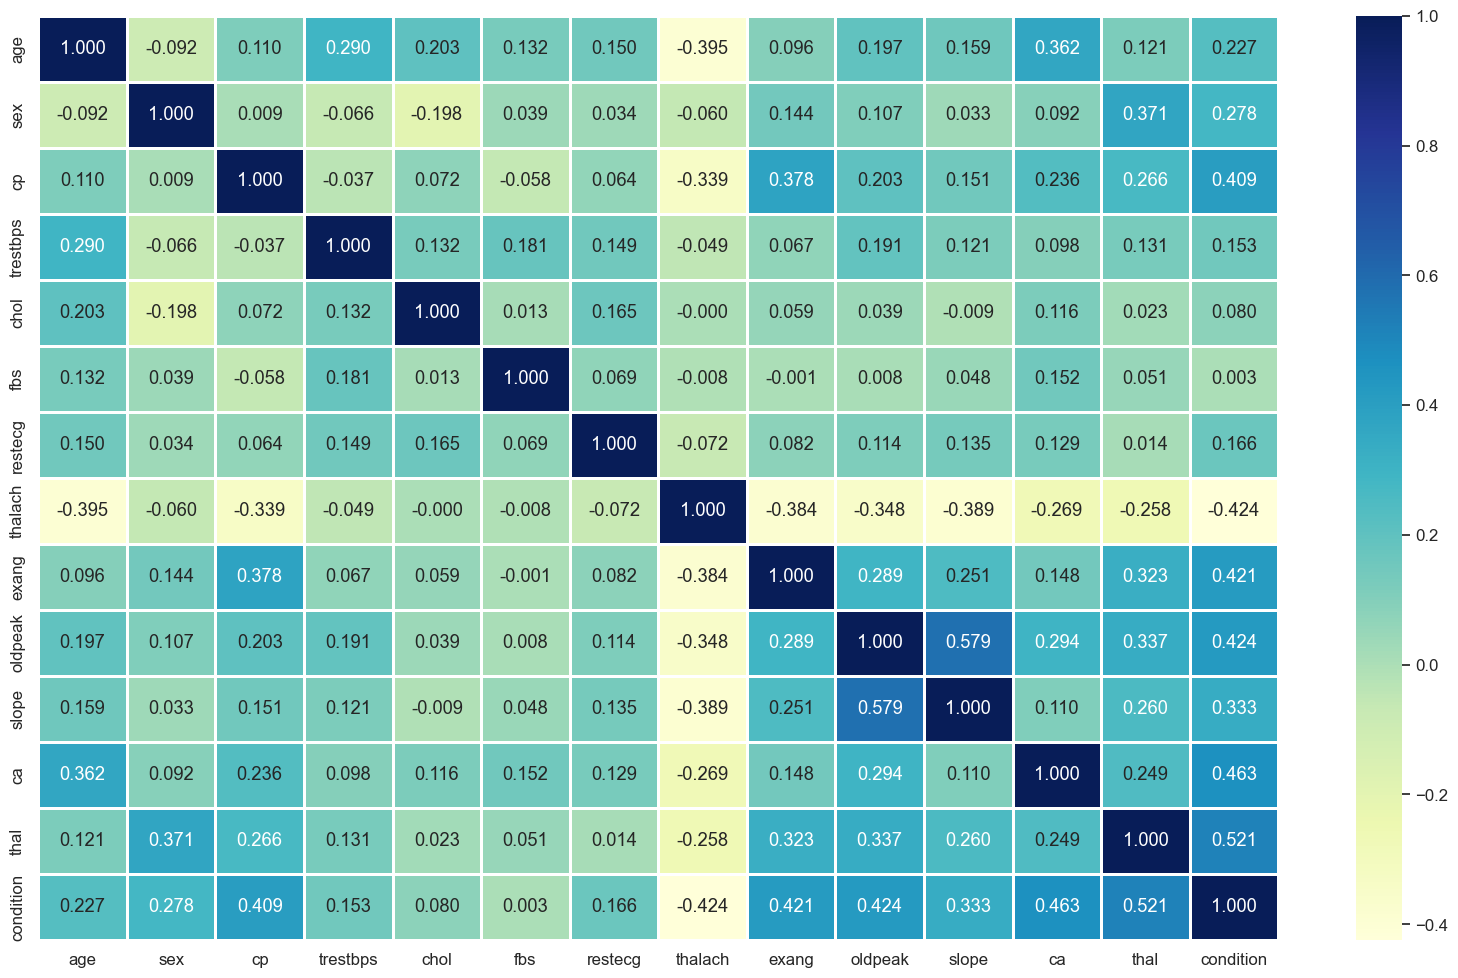

In [28]:
# Correlation heatmap between variables:

sns.set(font_scale=1.1)
correlation_train = raw_heat.corr()

mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 12))

sns.heatmap(correlation_train,
            annot=True,
            fmt='.3f',
            cmap='YlGnBu',
            linewidths=1,
            cbar=True)

plt.show()

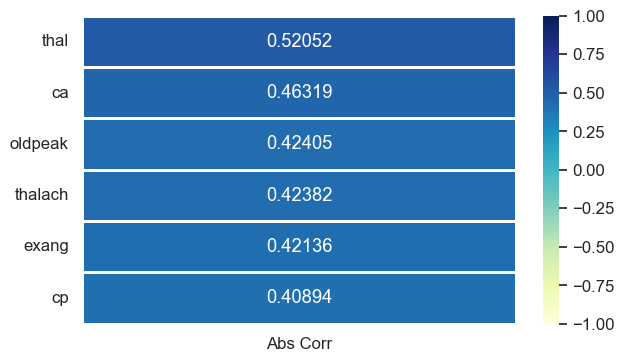

In [29]:
# Top correlated variables vs condition:

correlations = raw_heat.corrwith(raw_heat['condition']).iloc[:-1].to_frame()
correlations['Abs Corr'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('Abs Corr', ascending=False)['Abs Corr']

fig, ax = plt.subplots(figsize=(7,4))
sns.heatmap(sorted_correlations.to_frame()[sorted_correlations>=.4], 
            cmap='YlGnBu', 
            annot=True, 
            vmin=-1, 
            vmax=1,
            linewidths=1,
            fmt='.5f', 
            ax=ax);